In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
demographic_data = "resources/Demographics.csv"
birth_data = "resources/Birth_Statistics.csv"
cancer_data = "resources/Cancer_Rates.csv"
hospital_data = "resources/Hospitalization_Discharge_Rates.csv"
health_data = "resources/LakeCounty_Health.csv"
mortality_data = "resources/Mortality_Rates.csv"
obesity_data = "resources/Obesity_Percentages.csv"


# Read the mouse data and the study results
county_demographic_data = pd.read_csv(demographic_data)
county_birth_data = pd.read_csv(birth_data)
county_cancer_data = pd.read_csv(cancer_data)
county_hospital_data = pd.read_csv(hospital_data)
county_mortality_data = pd.read_csv(mortality_data)
county_obesity_data = pd.read_csv(obesity_data)

#demographics
county_demographic_data.head()


,OBJECTID,ZIP,Total_Pop,White__,African_Am,Asian__,Hispanic_o,No_English,Under_5yea,Under_18ye,...,Female_,High_Schoo,Associate_,Bachelor_D,Food_Stamp,Med_Income,No_HS,Poverty,SHAPE_Length,SHAPE_Area
0,1,60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,...,46.858671,94.3,8.2,29.3,7.528748,75928,5.7,10.5,215525.155184,-1.149062e+09
1,2,60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,...,51.193264,97.2,5.4,64.3,2.462192,122789,2.8,4.9,178637.109618,-8.027354e+08
2,3,60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,...,51.006466,97.6,3.5,71.5,1.739495,130140,2.5,3.5,111400.890558,-3.674576e+08
3,4,60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,...,51.912942,88.9,7.9,22.7,14.162791,55431,11.2,11.2,92363.084625,-1.666177e+08
4,5,60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,...,50.214698,93.8,6.2,45.5,7.104066,81055,6.2,5.5,247258.224672,-8.455179e+08


In [2]:
county_birth_data.head()

,OBJECTID,ZIP,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare,SHAPE_Length,SHAPE_Area
0,1,60002,0.084837,0.134124,18.5,10.440239,74.639700,215525.155184,-1.149062e+09
1,2,60010,0.052208,0.080828,1.4,3.219561,86.189946,178637.109618,-8.027354e+08
2,3,60015,0.095519,0.101959,1.8,7.635261,83.544132,111400.890558,-3.674576e+08
3,4,60020,0.077067,0.087777,29.9,13.737068,79.075398,92363.084625,-1.666177e+08
4,5,60030,0.071311,0.086675,6.2,10.598146,81.745316,247258.224672,-8.455179e+08


In [3]:
zip_code_df=pd.merge(county_demographic_data, county_birth_data, on= ["ZIP", "OBJECTID", "SHAPE_Length", "SHAPE_Area"] )
zip_code_df.head()

,OBJECTID,ZIP,Total_Pop,White__,African_Am,Asian__,Hispanic_o,No_English,Under_5yea,Under_18ye,...,Med_Income,No_HS,Poverty,SHAPE_Length,SHAPE_Area,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare
0,1,60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,...,75928,5.7,10.5,215525.155184,-1.149062e+09,0.084837,0.134124,18.5,10.440239,74.639700
1,2,60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,...,122789,2.8,4.9,178637.109618,-8.027354e+08,0.052208,0.080828,1.4,3.219561,86.189946
2,3,60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,...,130140,2.5,3.5,111400.890558,-3.674576e+08,0.095519,0.101959,1.8,7.635261,83.544132
3,4,60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,...,55431,11.2,11.2,92363.084625,-1.666177e+08,0.077067,0.087777,29.9,13.737068,79.075398
4,5,60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,...,81055,6.2,5.5,247258.224672,-8.455179e+08,0.071311,0.086675,6.2,10.598146,81.745316


In [4]:
df = zip_code_df.set_index("ZIP")
df.head()

,OBJECTID,Total_Pop,White__,African_Am,Asian__,Hispanic_o,No_English,Under_5yea,Under_18ye,F18to64year,...,Med_Income,No_HS,Poverty,SHAPE_Length,SHAPE_Area,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare
ZIP,,,,,,,,,,,,,,,,,,,,,
60002,1,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,63.0,...,75928,5.7,10.5,215525.155184,-1.149062e+09,0.084837,0.134124,18.5,10.440239,74.639700
60010,2,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,57.2,...,122789,2.8,4.9,178637.109618,-8.027354e+08,0.052208,0.080828,1.4,3.219561,86.189946
60015,3,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,58.7,...,130140,2.5,3.5,111400.890558,-3.674576e+08,0.095519,0.101959,1.8,7.635261,83.544132
60020,4,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,63.2,...,55431,11.2,11.2,92363.084625,-1.666177e+08,0.077067,0.087777,29.9,13.737068,79.075398
60030,5,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,62.0,...,81055,6.2,5.5,247258.224672,-8.455179e+08,0.071311,0.086675,6.2,10.598146,81.745316


In [5]:
df.columns

Index(['OBJECTID', 'Total_Pop', 'White__', 'African_Am', 'Asian__',
       'Hispanic_o', 'No_English', 'Under_5yea', 'Under_18ye', 'F18to64year',
       'F65years_an', 'Male_', 'Female_', 'High_Schoo', 'Associate_',
       'Bachelor_D', 'Food_Stamp', 'Med_Income', 'No_HS', 'Poverty',
       'SHAPE_Length', 'SHAPE_Area', 'LBW', 'Preterm', 'TeenBirth',
       'Birth_Rate', 'F1stTriCare'],
      dtype='object')

In [6]:
#del df ["OBJECTID"]
#del df ["SHAPE_Length"]
#del df ["SHAPE_Area"]
df.drop (["OBJECTID", "SHAPE_Length", "SHAPE_Area"], axis=1, inplace=True)
df.head()

,Total_Pop,White__,African_Am,Asian__,Hispanic_o,No_English,Under_5yea,Under_18ye,F18to64year,F65years_an,...,Bachelor_D,Food_Stamp,Med_Income,No_HS,Poverty,LBW,Preterm,TeenBirth,Birth_Rate,F1stTriCare
ZIP,,,,,,,,,,,,,,,,,,,,,
60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,63.0,12.8,...,29.3,7.528748,75928,5.7,10.5,0.084837,0.134124,18.5,10.440239,74.639700
60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,57.2,18.4,...,64.3,2.462192,122789,2.8,4.9,0.052208,0.080828,1.4,3.219561,86.189946
60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,58.7,14.6,...,71.5,1.739495,130140,2.5,3.5,0.095519,0.101959,1.8,7.635261,83.544132
60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,63.2,15.3,...,22.7,14.162791,55431,11.2,11.2,0.077067,0.087777,29.9,13.737068,79.075398
60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,62.0,12.7,...,45.5,7.104066,81055,6.2,5.5,0.071311,0.086675,6.2,10.598146,81.745316


In [7]:
df.columns

Index(['Total_Pop', 'White__', 'African_Am', 'Asian__', 'Hispanic_o',
       'No_English', 'Under_5yea', 'Under_18ye', 'F18to64year', 'F65years_an',
       'Male_', 'Female_', 'High_Schoo', 'Associate_', 'Bachelor_D',
       'Food_Stamp', 'Med_Income', 'No_HS', 'Poverty', 'LBW', 'Preterm',
       'TeenBirth', 'Birth_Rate', 'F1stTriCare'],
      dtype='object')

In [8]:
df.rename(columns = {'Total_Pop':'Total Population', 'White__':'White(%)',
                              'African_Am':'African American(%)', 'Asian__':'Asian(%)', 'Hispanic_o':"Hispanic(%)", 'Under_5yea':"Under 5 years old(%)", "Under_18ye":"Under 18 years old(%)",'No_English':'Does not Speak English(%)', 'F18to64year': "18 to 64 years old(%)",'F65years_an':'65 years and older(%)', 'Male_':'Male(%)', 'Female_':'Female(%)', 'High_Schoo':'High School(%)', 'Associate_':'Associates Degree(%)', 'Bachelor_D':'Bachelors Degree(%)', 'Food_Stamp':'Utilizes Food Stamps(%)', 'Med_Income':'Median Household Income', 'No_HS':'No High School(%)', 'LBW':'Low Birth Weight', 'Preterm':'Preterm Birth', 'TeenBirth':'Teen Birth','Birth_Rate': 'Birth Rate', 'F1stTriCare':"1st Trimester of Care" }, inplace = True)
print(df.columns)

Index(['Total Population', 'White(%)', 'African American(%)', 'Asian(%)',
       'Hispanic(%)', 'Does not Speak English(%)', 'Under 5 years old(%)',
       'Under 18 years old(%)', '18 to 64 years old(%)',
       '65 years and older(%)', 'Male(%)', 'Female(%)', 'High School(%)',
       'Associates Degree(%)', 'Bachelors Degree(%)',
       'Utilizes Food Stamps(%)', 'Median Household Income',
       'No High School(%)', 'Poverty', 'Low Birth Weight', 'Preterm Birth',
       'Teen Birth', 'Birth Rate', '1st Trimester of Care'],
      dtype='object')


In [9]:
 df.head()

,Total Population,White(%),African American(%),Asian(%),Hispanic(%),Does not Speak English(%),Under 5 years old(%),Under 18 years old(%),18 to 64 years old(%),65 years and older(%),...,Bachelors Degree(%),Utilizes Food Stamps(%),Median Household Income,No High School(%),Poverty,Low Birth Weight,Preterm Birth,Teen Birth,Birth Rate,1st Trimester of Care
ZIP,,,,,,,,,,,,,,,,,,,,,
60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,63.0,12.8,...,29.3,7.528748,75928,5.7,10.5,0.084837,0.134124,18.5,10.440239,74.639700
60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,57.2,18.4,...,64.3,2.462192,122789,2.8,4.9,0.052208,0.080828,1.4,3.219561,86.189946
60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,58.7,14.6,...,71.5,1.739495,130140,2.5,3.5,0.095519,0.101959,1.8,7.635261,83.544132
60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,63.2,15.3,...,22.7,14.162791,55431,11.2,11.2,0.077067,0.087777,29.9,13.737068,79.075398
60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,62.0,12.7,...,45.5,7.104066,81055,6.2,5.5,0.071311,0.086675,6.2,10.598146,81.745316


In [10]:
df["Abbreviated ZIP"] = df.index
df["Abbreviated ZIP"] = df["Abbreviated ZIP"].astype(str)
df["Abbreviated ZIP"].replace({"600":""})
df["Abbreviated ZIP"]=[x[3:5]for x in df["Abbreviated ZIP"]]
df.head()

,Total Population,White(%),African American(%),Asian(%),Hispanic(%),Does not Speak English(%),Under 5 years old(%),Under 18 years old(%),18 to 64 years old(%),65 years and older(%),...,Utilizes Food Stamps(%),Median Household Income,No High School(%),Poverty,Low Birth Weight,Preterm Birth,Teen Birth,Birth Rate,1st Trimester of Care,Abbreviated ZIP
ZIP,,,,,,,,,,,,,,,,,,,,,
60002,24305,88.648426,1.197285,2.493314,5.315779,10.2,5.6,24.1,63.0,12.8,...,7.528748,75928,5.7,10.5,0.084837,0.134124,18.5,10.440239,74.639700,02
60010,44416,82.598613,0.569615,10.340868,4.723523,18.8,4.6,24.5,57.2,18.4,...,2.462192,122789,2.8,4.9,0.052208,0.080828,1.4,3.219561,86.189946,10
60015,27373,88.528842,0.895043,4.460600,4.946480,17.0,4.7,26.5,58.7,14.6,...,1.739495,130140,2.5,3.5,0.095519,0.101959,1.8,7.635261,83.544132,15
60020,10246,80.665626,1.542065,4.509077,12.590279,22.3,8.6,21.4,63.2,15.3,...,14.162791,55431,11.2,11.2,0.077067,0.087777,29.9,13.737068,79.075398,20
60030,36563,77.594836,2.885431,5.688811,11.566338,16.1,5.7,25.3,62.0,12.7,...,7.104066,81055,6.2,5.5,0.071311,0.086675,6.2,10.598146,81.745316,30


**Median Household Income vs Poverty**

R squared: 0.5660182359702471


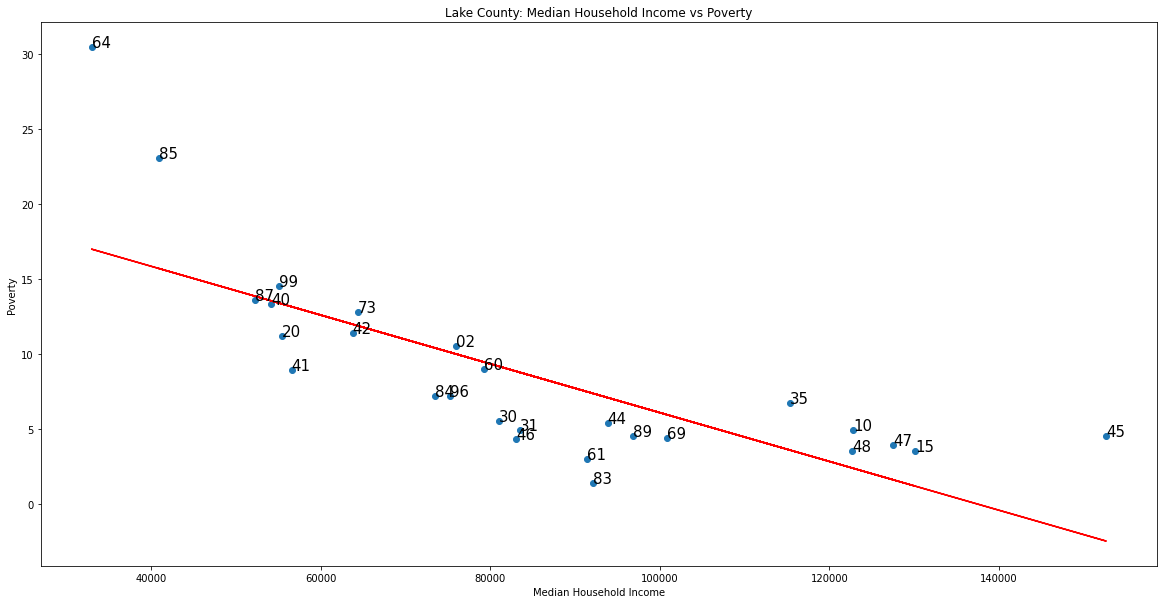

In [11]:
x_values = list(df["Median Household Income"])
y_values = list(df["Poverty"])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('Poverty')
plt.title("Lake County: Median Household Income vs Poverty")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_0")


![alt text](dem_and_birth_figs/fig_0.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to families whose income is below the poverty level there is a moderate positive correlation. 

**Median Household Income vs Race**

R squared: 0.4575551207442997


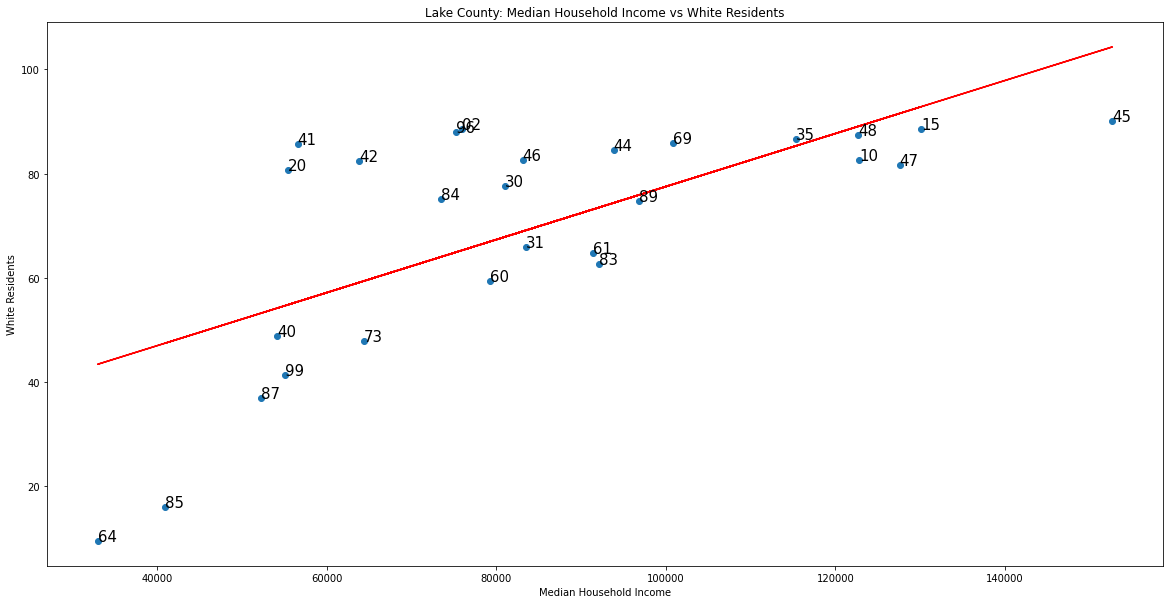

In [12]:
x_values = list(df["Median Household Income"])
y_values = list(df['White(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('White Residents')
plt.title("Lake County: Median Household Income vs White Residents")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_1")



![alt text](dem_and_birth_figs/fig_1.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of white residents there is a low positive correlation. 

R squared: 0.1297789979236246


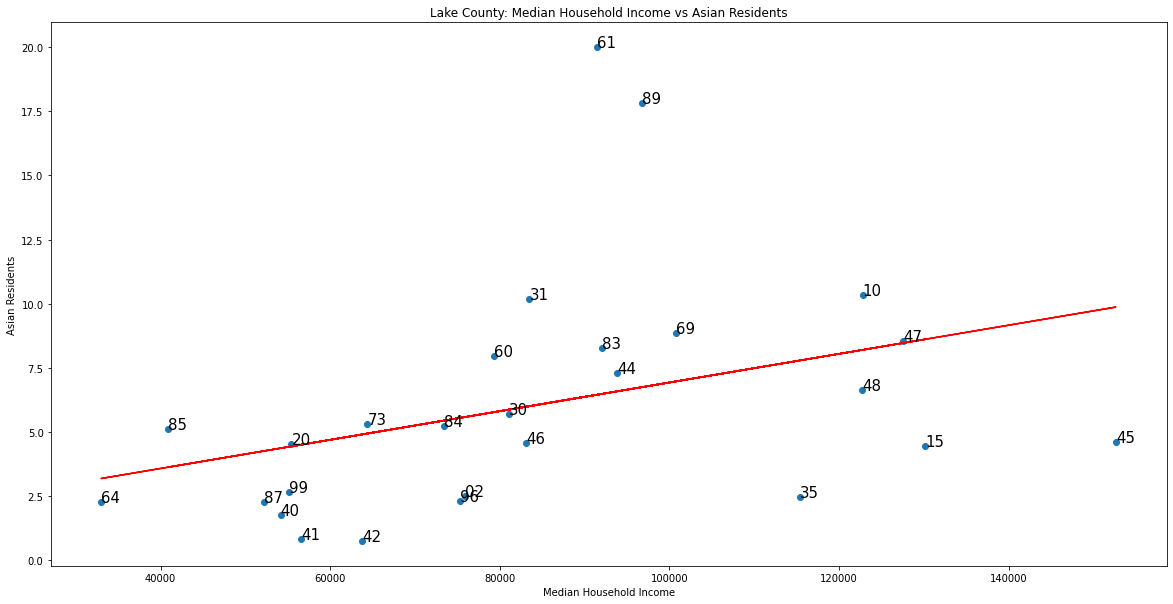

In [13]:
x_values = list(df["Median Household Income"])
y_values = list(df['Asian(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('Asian Residents')
plt.title("Lake County: Median Household Income vs Asian Residents")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_2")



![alt text](dem_and_birth_figs/fig_2.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of Asian residents there is a negligible correlation. 

R squared: 0.5129265226246401


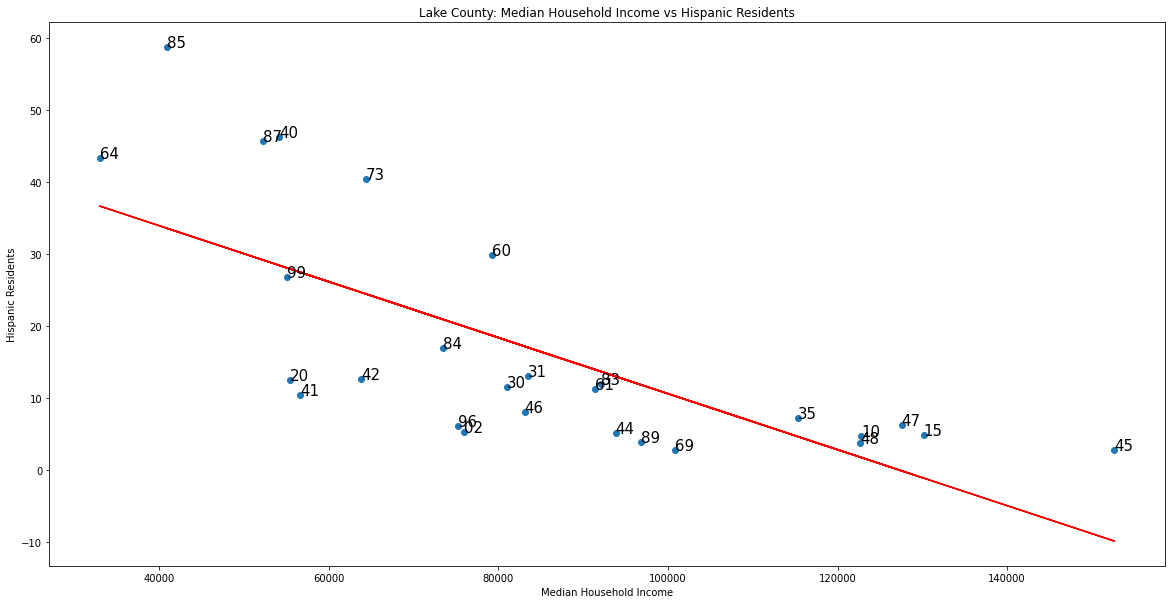

In [14]:
x_values = list(df["Median Household Income"])
y_values = list(df['Hispanic(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('Hispanic Residents')
plt.title("Lake County: Median Household Income vs Hispanic Residents")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_3")



![alt text](dem_and_birth_figs/fig_3.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of Hispanic residents there is a moderate positive correlation. 

R squared: 0.2666830501179737


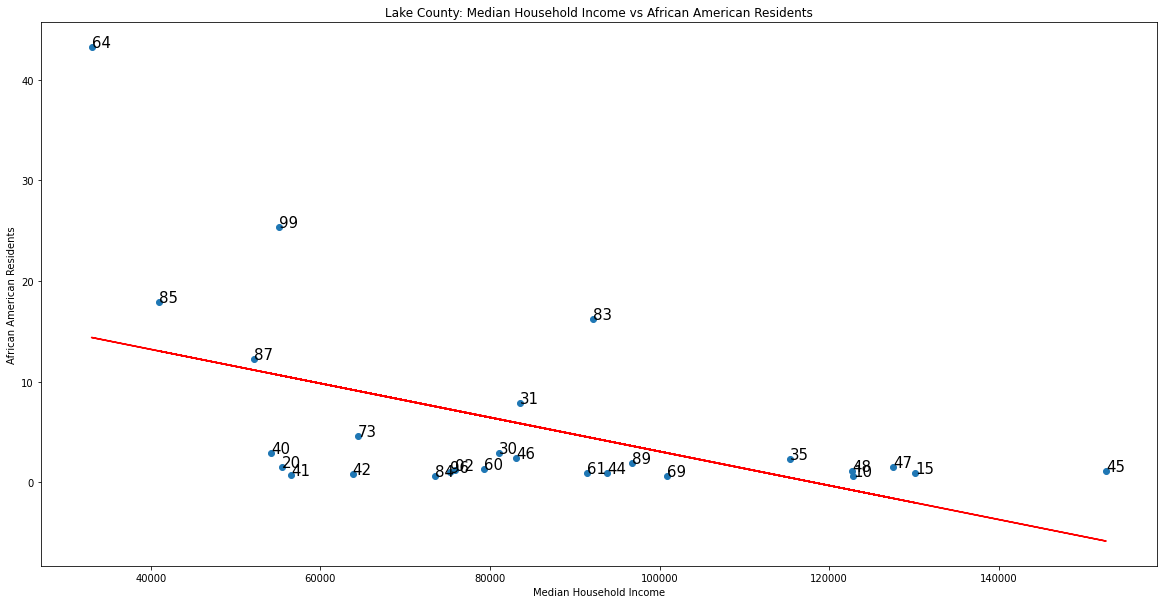

In [15]:
x_values = list(df["Median Household Income"])
y_values = list(df['African American(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('African American Residents')
plt.title("Lake County: Median Household Income vs African American Residents")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_4")



![alt text](dem_and_birth_figs/fig_4.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of African American residents there is a negligible correlation. 

**Median Household income vs Education**

R squared: 0.6062733028156738


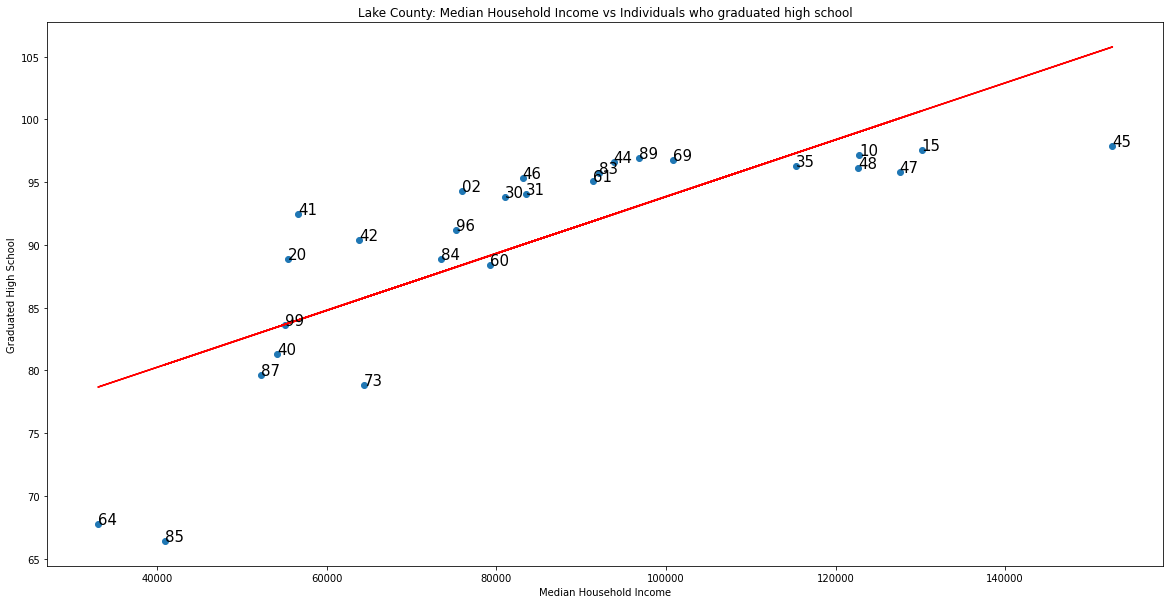

In [16]:
x_values = list(df["Median Household Income"])
y_values = list(df['High School(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('Graduated High School')
plt.title("Lake County: Median Household Income vs Individuals who graduated high school")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_5")



![alt text](dem_and_birth_figs/fig_5.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of individuals who have obtained a high school degree there is a moderate positive correlation. 

R squared: 0.14126213556115494


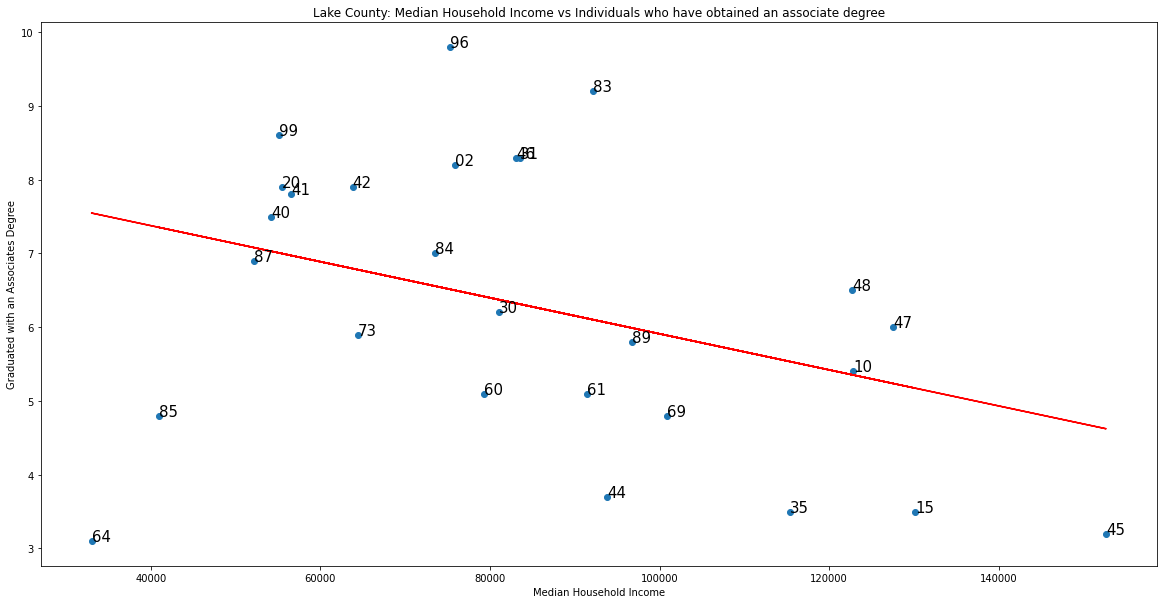

In [17]:
x_values = list(df["Median Household Income"])
y_values = list(df['Associates Degree(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('Graduated with an Associates Degree')
plt.title("Lake County: Median Household Income vs Individuals who have obtained an associate degree")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_6")



![alt text](dem_and_birth_figs/fig_6.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of individuals who have obtained a associate degree there is a  negligible correlation. 

R squared: 0.8433335797813858


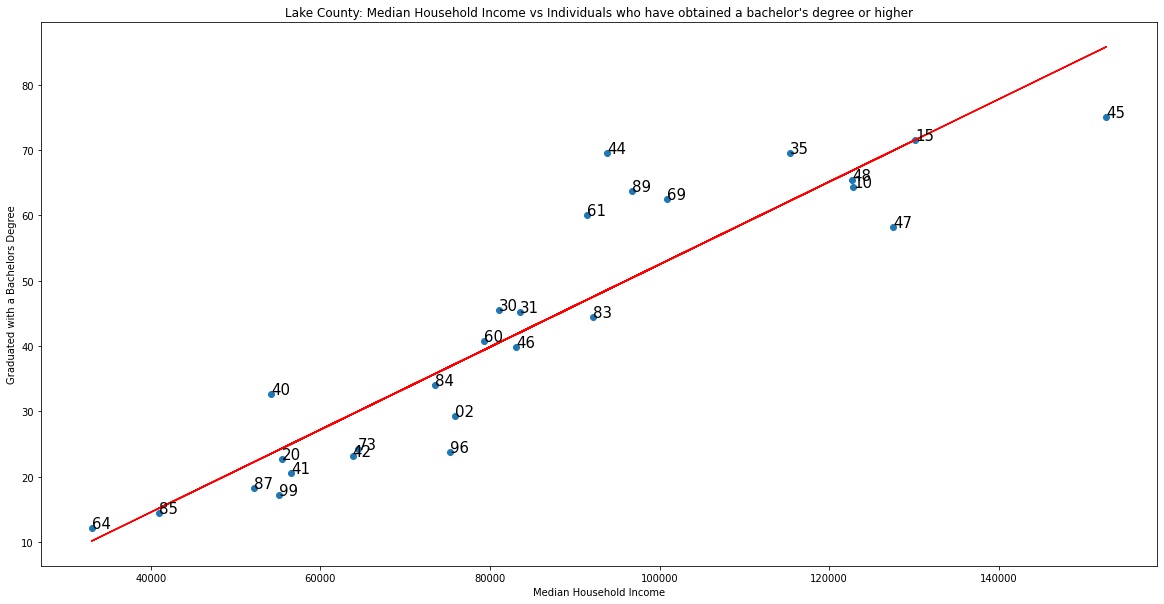

In [18]:
x_values = list(df["Median Household Income"])
y_values = list(df['Bachelors Degree(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('Graduated with a Bachelors Degree')
plt.title("Lake County: Median Household Income vs Individuals who have obtained a bachelor's degree or higher")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_7")



![alt text](dem_and_birth_figs/fig_7.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of individuals who have obtained a Bachelors degree there is a high positive correlation. 

R squared: 0.6079010718005828


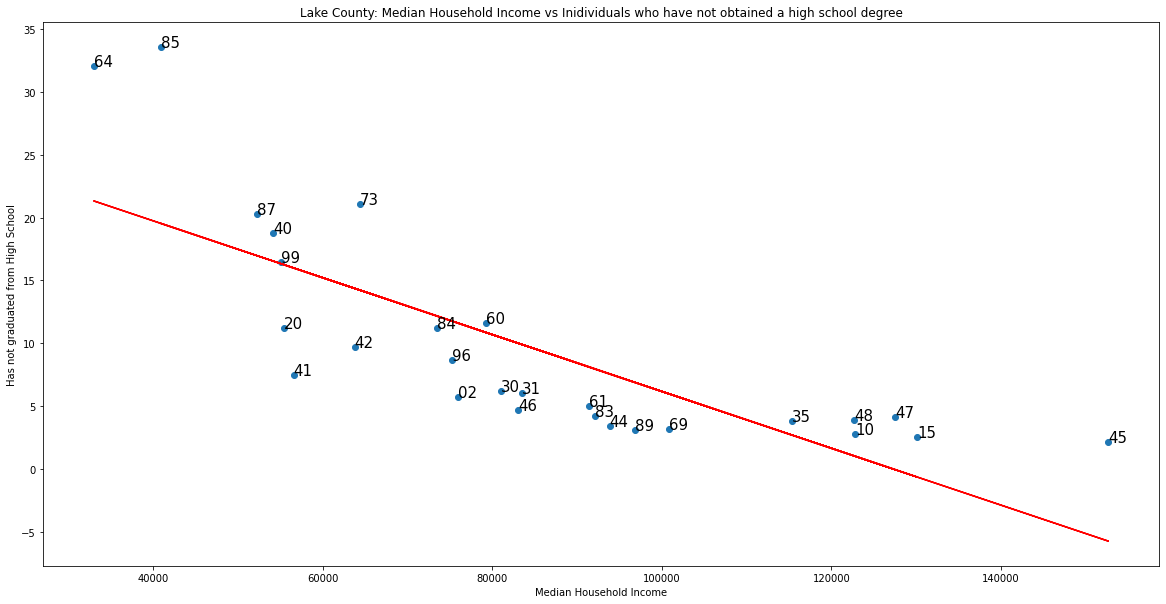

In [19]:
x_values = list(df["Median Household Income"])
y_values = list(df['No High School(%)'])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Median Household Income"] * slope + intercept

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Median Household Income')
plt.ylabel('Has not graduated from High School')
plt.title("Lake County: Median Household Income vs Inidividuals who have not obtained a high school degree")

print(f"R squared: {rvalue**2}")
plt.savefig("dem_and_birth_figs/fig_8")



![alt text](dem_and_birth_figs/fig_8.png)

**Discussion about linear relationship:** When comparing median household income earned by a given household to percent of individuals who have not obtained a high school degree there is a moderate positive correlation.



**Under 18 Births**


R squared: 0.25352518700691157


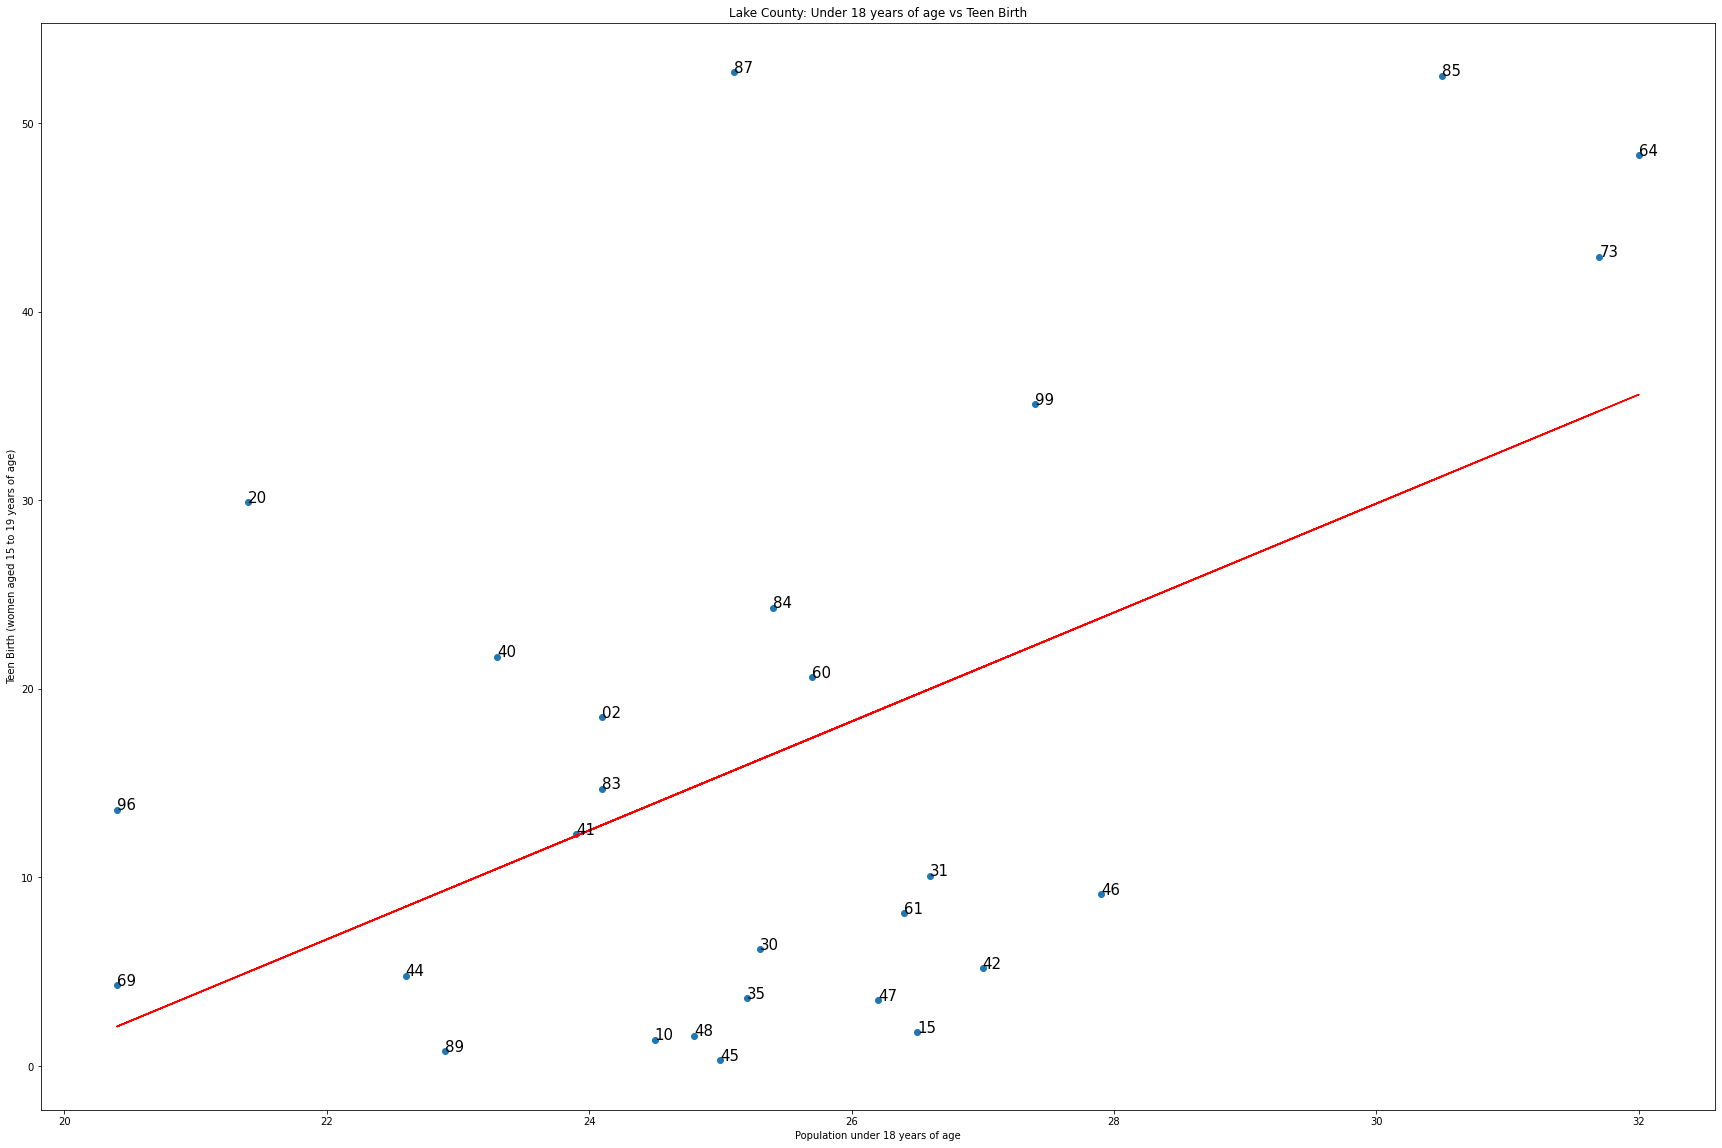

In [20]:
x_values = list(df['Under 18 years old(%)'])
y_values = list(df["Teen Birth"])
n = df["Abbreviated ZIP"]
#n = list(df.index)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df['Under 18 years old(%)'] * slope + intercept

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x_values,y_values)
for i, txt in enumerate(n):
    ax.annotate(txt, (x_values[i], y_values[i]), fontsize=15)

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Population under 18 years of age')
plt.ylabel('Teen Birth (women aged 15 to 19 years of age)')
plt.title("Lake County: Under 18 years of age vs Teen Birth")


print(f"R squared: {rvalue**2}")

plt.savefig("dem_and_birth_figs/fig_9")



![alt text](dem_and_birth_figs/fig_9.png)

**Discussion about linear relationship:** When comparing individuals who are under 18 years of age to teen births there is a negligible correlation.